# Lorenz attractor

以下のローレンツ方程式を、数値的に計算する。

$
\frac{\mathrm{d}x}{\mathrm{d}t} = -px + py \\
\frac{\mathrm{d}y}{\mathrm{d}t} = -xz + rx - y \\
\frac{\mathrm{d}z}{\mathrm{d}t} = xy - bz \\
$

これは$x, y, z$の３変数についての方程式で、システムのふるまいは$p, r, b$によって決まる。

マサチューセッツ工科大学の気象学者、エドワード・N・ローレンツ (Edward N. Lorenz) が、論文「決定論的非周期な流れ（ Deterministic Nonperiodic Flow）」 (1963) の中で提示した。

決定論的な連立常微分方程式が初期値鋭敏性を持つことは驚きをもって迎えられ、カオス研究の端緒となった。

（[Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AD%E3%83%BC%E3%83%AC%E3%83%B3%E3%83%84%E6%96%B9%E7%A8%8B%E5%BC%8F)より一部引用）

今回の例では、ローレンツが与えた p = 10、r = 28、b = 8/3 という設定での x, y, zの軌跡を計算する。

# ライブラリのインポート

In [1]:
import numpy as np # Pythonの基本的数値計算ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt # グラフ描画ライブラリ
from mpl_toolkits.mplot3d import Axes3D # ３次元グラフを描画するためのライブラリ

/home/keisukefujii/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 対象となる微分方程式の定義

与えられた$x, y, z, p, r, b$ を用いて、$\frac{\mathrm{d}x}{\mathrm{d}t}, \frac{\mathrm{d}y}{\mathrm{d}t}, \frac{\mathrm{d}z}{\mathrm{d}t}$ を返す関数。

In [2]:
def lorenz(x, y, z, p, r, b):
    dx_dt = -p*x + p*y
    dy_dt = -x*z + r*x - y
    dz_dt = x*y - b*z
    return dx_dt, dy_dt, dz_dt

# 初期値、計算条件の定義

上記微分方程式を、差分法により解く。

時刻$t = t_0$ での $x, y, z$での値をそれぞれ$x(t_0), y(t_0), z(t_0)$ とするとき、$t = t_0 + \Delta t$ での値を以下の式から計算する。

$
x(t_0 + \Delta t) = x(t_0) + \frac{\mathrm{d}x}{\mathrm{d}t} \Delta t 
$

$
y(t_0 + \Delta t) = y(t_0) + \frac{\mathrm{d}y}{\mathrm{d}t} \Delta t 
$

$
z(t_0 + \Delta t) = z(t_0) + \frac{\mathrm{d}z}{\mathrm{d}t} \Delta t \\
$

In [3]:
# これらの計算結果を格納するアレイを用意する。

dt = 0.01   # 時間ステップ Delta t
num_step = 10000 # 計算を行う回数。

xs = np.ndarray((num_step+1,))
ys = np.ndarray((num_step+1,))
zs = np.ndarray((num_step+1,))

初期値 $x(t=0) = x_0, y(t=0) = y_0, z(t=0) = z_0$ から計算をスタートする。

In [4]:
# x_0, y_0, z_0 の値をリストの一番最初の項に代入する。
xs[0] = 0.
ys[0] = 1.
zs[0] = 1.05

In [5]:
# p, r, b の値を代入する
p = 10.
r = 28.
b = 8./3.

# 繰り返し計算

In [6]:
for i in range(num_step):
    dx_dt, dy_dt, dz_dt = lorenz(xs[i], ys[i], zs[i], p, r, b)
    xs[i+1] = xs[i] + dx_dt * dt
    ys[i+1] = ys[i] + dy_dt * dt
    zs[i+1] = zs[i] + dz_dt * dt

# グラフ描画

## 基本的なグラフ描画

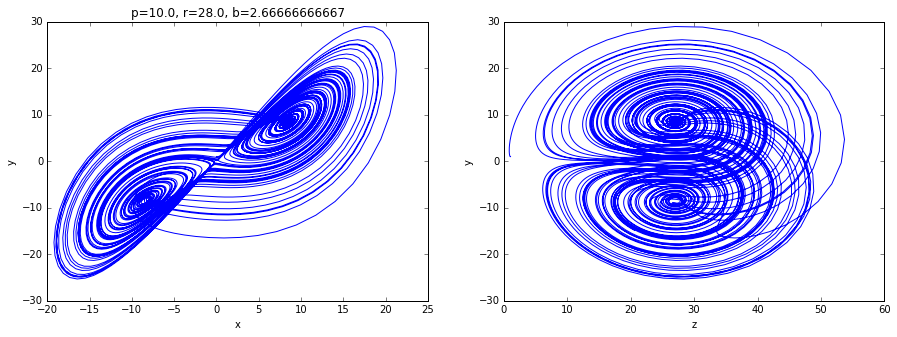

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) # グラフを横に２つ並べる。一つ目のグラフの描画を始める
plt.title('p='+str(p)+', r='+str(r)+', b='+str(b))
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2) # ２つ目のグラフの描画を始める
plt.plot(zs, ys)
plt.xlabel('z')
plt.ylabel('y')

## 線にグラデーションをつけて軌跡をわかりやすくする。

In [8]:
col = np.linspace(0., 1., num_step+1) # 徐々に色を変化させていくための配列。

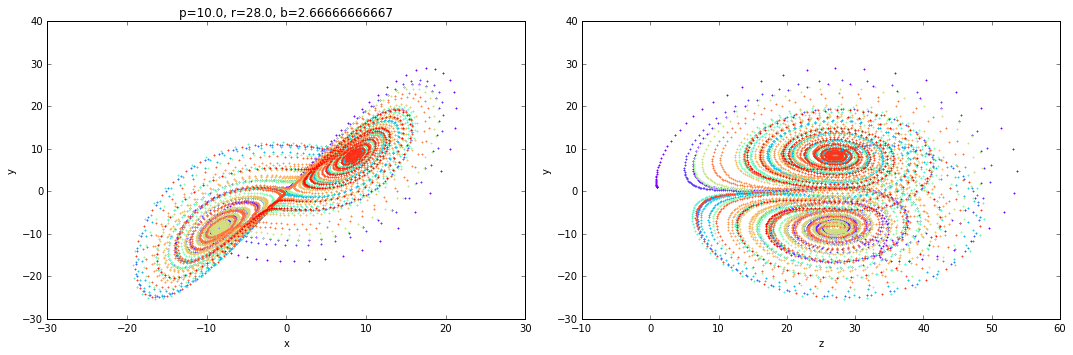

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) # グラフを横に２つ並べる。一つ目のグラフの描画を始める
plt.title('p='+str(p)+', r='+str(r)+', b='+str(b))
plt.scatter(xs, ys, marker='+', c=col, cmap=plt.cm.rainbow, s=4)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2) # ２つ目のグラフの描画を始める
plt.scatter(zs, ys, marker='+', c=col, cmap=plt.cm.rainbow, s=4)
plt.xlabel('z')
plt.ylabel('y')

plt.tight_layout()

## 3次元の図を描く

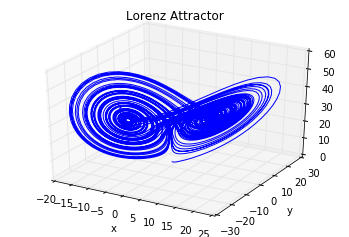

In [10]:
plt.figure()
plt.gca(projection='3d')

plt.plot(xs, ys, zs)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lorenz Attractor")

plt.show()